## CROP YIELD PREDICTION

The aim of this data science project is to predict crop yield using a dataset from Crop Yield Prediction. The dataset contains various environmental and agricultural factors, including rainfall, temperature, fertilizer usage, and soil macronutrient levels, along with the corresponding crop yield measured in quintals per acre. By analyzing these factors, the project seeks to build a predictive model that can help farmers and agricultural planners optimize crop production.

## Data Dictionary

| Column Name       | Description                     |
|------------------|---------------------------------|
| Rain Fall (mm)    | Rainfall in millimeters         |
| Temperature (C)   | Temperature in Celsius          |
| Fertilizer (kg)   | Fertilizer in kilograms         |
| Nitrogen (N)      | Nitrogen macronutrient          |
| Phosphorous (P)   | Phosphorous macronutrient       |
| Potassium (K)     | Potassium macronutrient         |
| Yield (Q/acres)   | Crop yield in quintals per acre |


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel("/content/crop yield data sheet.xlsx")
df.head()

,Rain Fall (mm),Fertilizer,Temperatue,Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
0,1230.0,80.0,28,80.0,24.0,20.0,12.0
1,480.0,60.0,36,70.0,20.0,18.0,8.0
2,1250.0,75.0,29,78.0,22.0,19.0,11.0
3,450.0,65.0,35,70.0,19.0,18.0,9.0
4,1200.0,80.0,27,79.0,22.0,19.0,11.0


### Data Preprocessing

The dataset was inspected for inconsistencies and missing values. The Temperature column contained invalid entries represented as ":", which were removed, and the column was converted to float type. Missing values in all columns were replaced with the median of their respective columns to ensure data integrity.

In [ ]:
# Checking the shape of the dataset
df.shape

(109, 7)

In [ ]:
# Checking the data types of the columns
df.dtypes

,0
Rain Fall (mm),float64
Fertilizer,float64
Temperatue,object
Nitrogen (N),float64
Phosphorus (P),float64
Potassium (K),float64
Yeild (Q/acre),float64


The Temperature column currently has an object data type. It must be converted to float for proper analysis. Before conversion, the values in the column are being examined to identify any invalid or non-numeric entries.

In [ ]:
df['Temperatue'].unique()

array([28, 36, 29, 35, 27, 34, 37, 39, 26, 38, 24, 25, 40, nan, ':'],
      dtype=object)

The Temperature column contains an invalid value ":". This value needs to be removed before converting the column to float data type to ensure accurate analysis.

In [ ]:
# Dropping ":" from the Temperatue column
df = df[df['Temperatue'] != ':']

In [ ]:
# converting the Temperatue column to float
df['Temperatue'] = df['Temperatue'].astype(float)

In [ ]:
# Checking for null values
df.isnull().sum()

,0
Rain Fall (mm),9
Fertilizer,9
Temperatue,9
Nitrogen (N),9
Phosphorus (P),9
Potassium (K),9
Yeild (Q/acre),9


Replacing missing values with median of the column

In [ ]:
# replacing missing values with median
columns = [df.columns]
for col in columns:
    df[col] = df[col].fillna(df[col].median())

In [ ]:
# descriptive statistics
df.describe()

,Rain Fall (mm),Fertilizer,Temperatue,Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,874.814815,67.990741,32.111111,70.759259,21.120370,18.138889,9.046296
std,391.818744,9.616473,5.277944,6.390516,1.868167,1.758601,1.881460
min,400.000000,50.000000,24.000000,59.000000,18.000000,15.000000,5.500000
25%,450.000000,60.000000,28.000000,65.000000,20.000000,16.000000,7.000000
50%,1150.000000,70.000000,29.000000,71.000000,21.000000,19.000000,9.000000
75%,1226.250000,77.000000,38.000000,76.250000,23.000000,19.000000,11.000000
max,1300.000000,80.000000,40.000000,80.000000,25.000000,22.000000,12.000000


In [ ]:
df.head()

,Rain Fall (mm),Fertilizer,Temperatue,Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
0,1230.0,80.0,28.0,80.0,24.0,20.0,12.0
1,480.0,60.0,36.0,70.0,20.0,18.0,8.0
2,1250.0,75.0,29.0,78.0,22.0,19.0,11.0
3,450.0,65.0,35.0,70.0,19.0,18.0,9.0
4,1200.0,80.0,27.0,79.0,22.0,19.0,11.0


## Exploratory Data Analysis (EDA)

EDA revealed several key insights:

- The dataset likely represents two distinct crops, suggested by clusters in graphs of rainfall, temperature, and crop yield.

- Fertilizer usage generally shows a proportional relationship with crop yield, though some exceptions exist.

- Temperature and rainfall display distinct patterns that may correspond to different crop seasons.

- Macronutrients (Nitrogen, Phosphorus, Potassium) show varying distributions, reflecting differences in crop requirements.

- Among all factors, temperature appears to be the most influential in predicting crop yield, followed by rainfall.



### Rainfall Distribution

<Axes: xlabel='Rain Fall (mm)', ylabel='Count'>

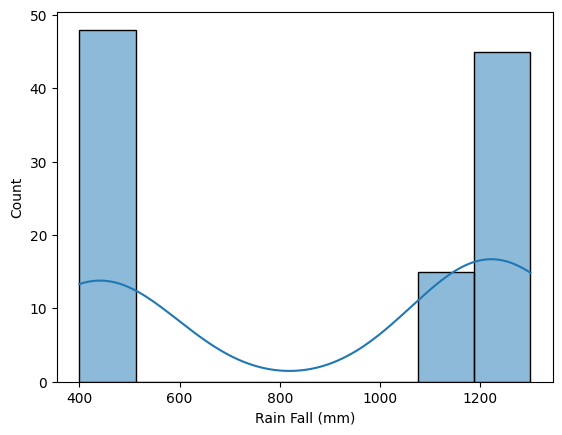

In [ ]:
sns.histplot(x = "Rain Fall (mm)", data = df, kde = True)

The histogram above shows the distribution of rainfall (mm). It is clear that the rainfall is not normally distributed. Most values fall either between 400–500 mm or above 1100 mm, suggesting that the dataset may include different crops that require varying amounts of rainfall.

### Fertilizer Distribution

<Axes: xlabel='Fertilizer', ylabel='Count'>

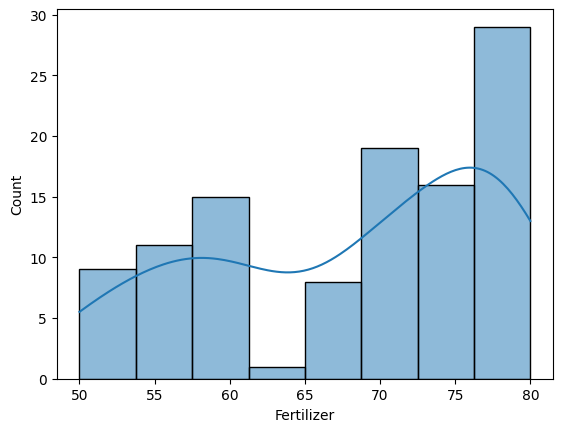

In [ ]:
sns.histplot(x = "Fertilizer", data = df, kde = True)

### Temperature Distribution

<Axes: xlabel='Temperatue', ylabel='Count'>

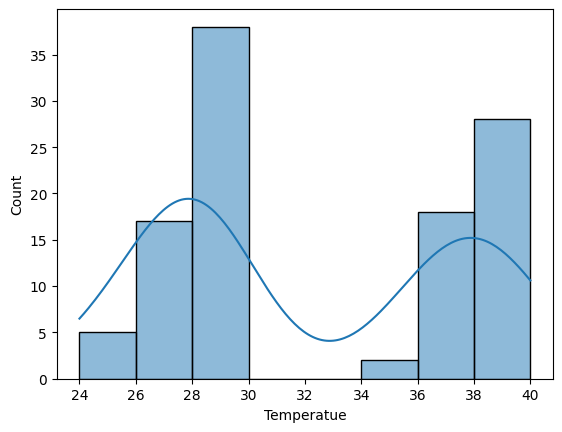

In [ ]:
sns.histplot(x="Temperatue", data = df, kde = True)

The temperature graph also displays two distinct peaks, similar to the rainfall and fertilizer distributions, suggesting that the dataset may include two different crops. The temperature is not normally distributed, with most values either between 25-30°C or 35-40°C, which could indicate the presence of Rabi and Kharif crops in the dataset.

### Macronutrients (NPK) Distribution

<Axes: xlabel='Potassium (K)', ylabel='Count'>

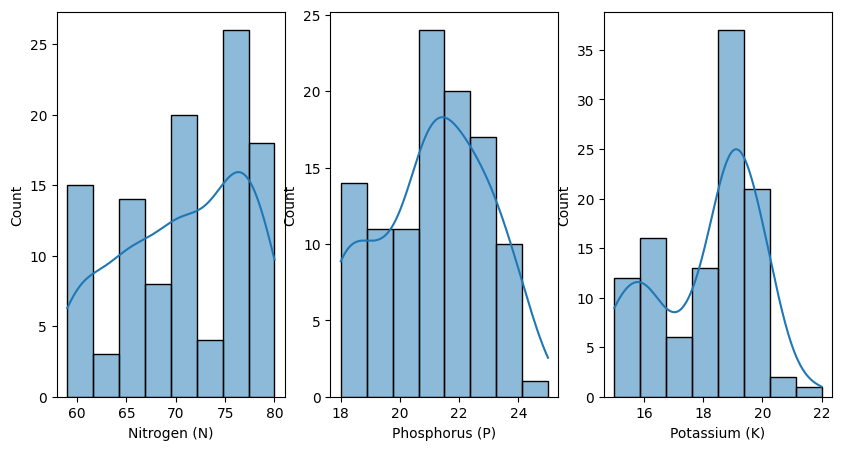

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(10, 5))
sns.histplot(x = "Nitrogen (N)", data = df, kde = True, ax = ax[0])
sns.histplot(x = "Phosphorus (P)", data = df, kde = True, ax = ax[1])
sns.histplot(x = "Potassium (K)", data = df, kde = True, ax = ax[2])

These three graphs show the distribution of macronutrients used in the crops. The Nitrogen graph indicates that a larger quantity is applied compared to the other nutrients. Phosphorus usage is lower than nitrogen, while Potassium is used in much smaller amounts but still exhibits two distinct peaks. This pattern suggests that the dataset may include two different crops with different potassium requirements, while nitrogen and phosphorus requirements remain relatively similar.

### Yield Distribution

<Axes: xlabel='Yeild (Q/acre)', ylabel='Count'>

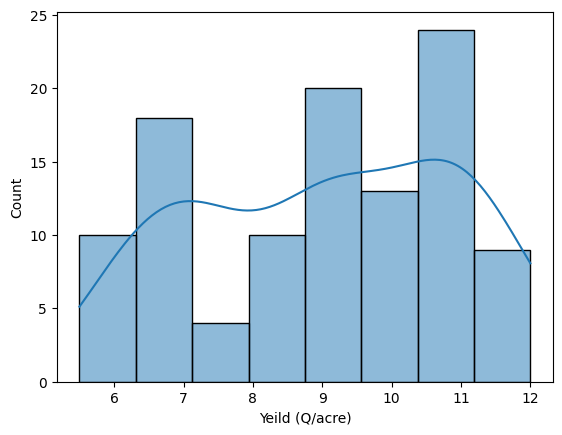

In [ ]:
sns.histplot(x = "Yeild (Q/acre)", data = df, kde = True)

The distribution of crop yield reveals two smaller peaks, suggesting that the dataset may include two different crops grown on similar soil types.

Based on the distributions across all columns, several hypotheses have been formed, such as the presence of two distinct crops and possible relationships between crop yield and other factors. These hypotheses will be examined in the next section of the analysis.

### RainFall and Crop Yield

<Axes: xlabel='Rain Fall (mm)', ylabel='Yeild (Q/acre)'>

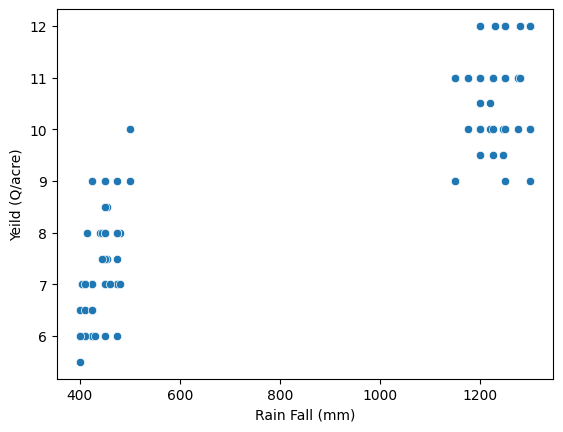

In [ ]:
sns.scatterplot(x = 'Rain Fall (mm)', y = 'Yeild (Q/acre)', data = df)

This graph reveals two distinct clusters in the rainfall data. The first cluster falls between 400-500 mm, while the second is above 1100 mm, indicating that one crop requires lower rainfall and the other requires higher rainfall. Despite this, differences in crop yield are still observed, which may be influenced by other factors such as temperature, fertilizer, macronutrients, and importantly, soil type.

### Ferilizer and Crop Yield

<Axes: xlabel='Fertilizer', ylabel='Yeild (Q/acre)'>

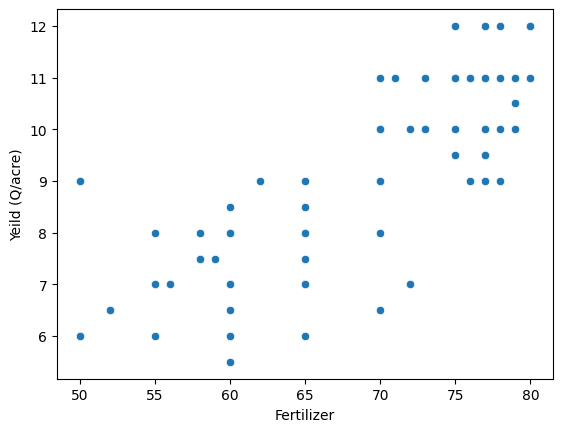

In [ ]:
sns.scatterplot(x = 'Fertilizer', y = 'Yeild (Q/acre)', data = df)

The graph indicates that crop yield is not strictly proportional to the amount of fertilizer applied. Several data points show high yields even when fertilizer usage is below 65 kg, suggesting that factors such as soil type and existing macronutrients may contribute significantly to the crop’s productivity.

### Temperature and Crop Yield

<Axes: xlabel='Temperatue', ylabel='Yeild (Q/acre)'>

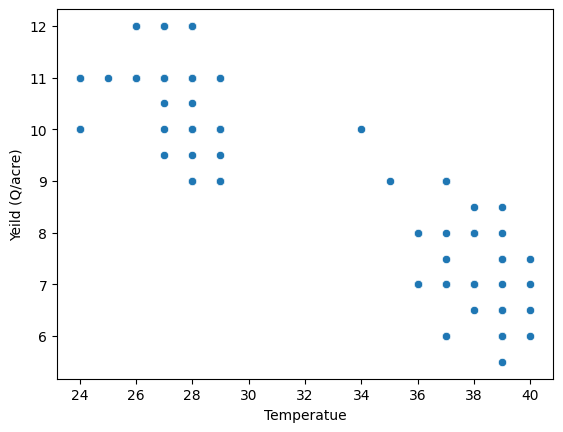

In [ ]:
sns.scatterplot(x = 'Temperatue', y = 'Yeild (Q/acre)', data = df)

The temperature-yield plot also reveals two distinct clusters, with one group between 25-30°C and another between 35-40°C, suggesting the presence of two different crops in the dataset. The cluster within 25-30°C shows higher crop yields compared to the 35-40°C range. This pattern may indicate that the higher-yielding cluster corresponds to a rabi crop, while the lower-yielding cluster likely represents a kharif crop, reflecting the influence of seasonal temperature differences on crop productivity.

### Macronutrients and Crop Yield

<Axes: xlabel='Potassium (K)', ylabel='Yeild (Q/acre)'>

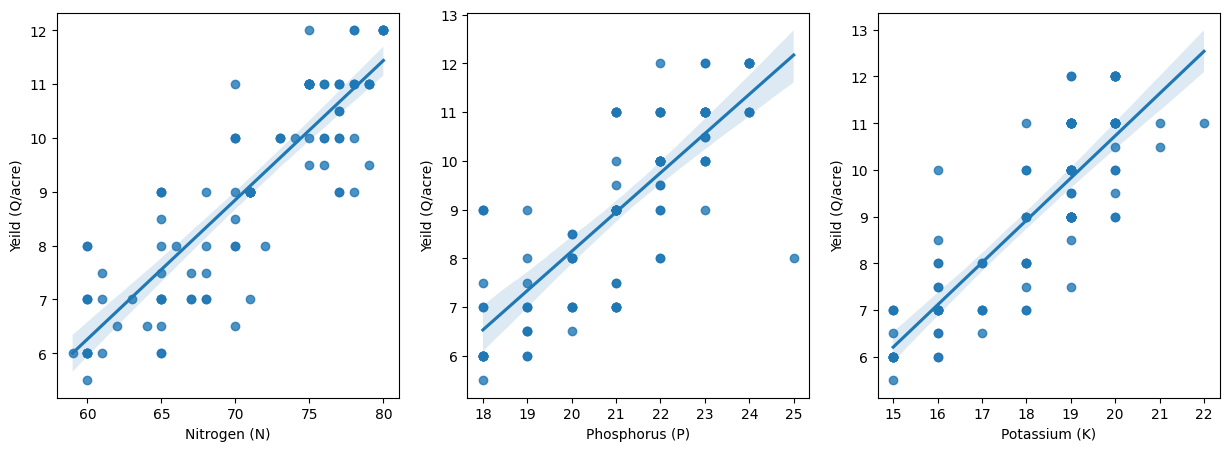

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(15, 5))
sns.regplot(x = 'Nitrogen (N)', y = 'Yeild (Q/acre)', data = df, ax = ax[0])
sns.regplot(x = 'Phosphorus (P)', y = 'Yeild (Q/acre)', data = df, ax = ax[1])
sns.regplot(x = 'Potassium (K)', y = 'Yeild (Q/acre)', data = df, ax = ax[2])

The nutrient-yield plots suggest a general positive relationship between macronutrient levels and crop yield, with higher nutrient values often corresponding to increased yields. This pattern indicates that nutrient availability plays an important role in crop productivity. However, several data points deviate from this trend, showing that yield is not determined by nutrients alone. These variations may be influenced by additional factors such as crop variety, soil characteristics, and local weather conditions.

## Correlation Matrix Heatmap

<Axes: >

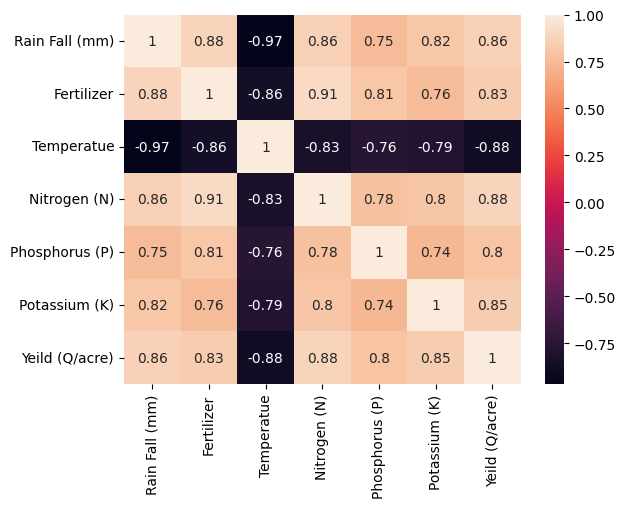

In [ ]:
sns.heatmap(df.corr(), annot = True)

Based on the exploratory data analysis, the dataset appears to represent two distinct crops, as indicated by the clear clustering observed in rainfall, temperature, and crop yield. While macronutrients show signs of a positive relationship with yield, the associations between crop yield and the remaining features are not strictly linear. These variations may be influenced by additional factors such as soil type, weather conditions, and crop variety. Overall, the dataset does not exhibit excessive complexity; however, drawing definitive conclusions solely from visualizations is limited, highlighting the need for predictive modeling to better capture these relationships.

## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Yeild (Q/acre)', axis = 1), df['Yeild (Q/acre)'], test_size = 0.2, random_state = 42)

## Model Building

1. Decision Tree Regressor
2. Random Forest Regressor

## Decision Tree Regressor


In [ ]:
from sklearn.tree import DecisionTreeRegressor

#Decision Tree Regressor object
dtr = DecisionTreeRegressor()

### Hyperparameter Tuning using GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

#parameters for grid search
para = {
    "max_depth": [2,4,6,8],
    "min_samples_split": [2,4,6,8],
    "min_samples_leaf": [2,4,6,8],
    "random_state": [0,42]
}

#Grid search object
grid = GridSearchCV(dtr, para, cv = 5, n_jobs = -1, verbose = 1)

#fitting the grid search object
grid.fit(X_train, y_train)

#best parameters
print(grid.best_params_)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
{'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 8, 'random_state': 0}


In [ ]:
#decision tree regressor with best parameters
dtr = DecisionTreeRegressor(max_depth = 4, min_samples_leaf = 2, min_samples_split = 8, random_state = 0)

#fitting the model
dtr.fit(X_train, y_train)

#training score
print(dtr.score(X_train, y_train))

#prediction
d_pred = dtr.predict(X_test)

0.9279431916668135


## Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

#Random Forest Regressor object
rfr = RandomForestRegressor()

### Hyperparameter Tuning using GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

#parameters for grid search
para = {
    "n_estimators": [100,200,300],
    "max_depth": [2,4,6,8],
    "min_samples_split": [2,4,6,8],
    "min_samples_leaf": [2,4,6,8],
    "random_state": [0,42]
}

#Grid search object
grid = GridSearchCV(rfr, para, cv = 5, n_jobs = -1, verbose = 1)

#fitting the grid search object
grid.fit(X_train, y_train)

#best parameters
print(grid.best_params_)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits
{'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 100, 'random_state': 42}


In [28]:
#Random Forest Regressor with best parameters
rfr = RandomForestRegressor(max_depth = 4, min_samples_leaf = 2, min_samples_split = 6, n_estimators = 100, random_state = 42)

#fitting the model
rfr.fit(X_train, y_train)

#training score
print(rfr.score(X_train, y_train))

#prediction
r_pred = rfr.predict(X_test)

0.9355014219068669


## Model Evaluation
Distribution Plot

/tmp/ipython-input-895377789.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, ax = ax[0]).set_title('Decision Tree Regressor')
/tmp/ipython-input-895377789.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d_pred, ax = ax[0])
/tmp/ipython-input-895377789.py:8: UserWarning: 

`distpl

<Axes: title={'center': 'Random Forest Regressor'}, xlabel='Yeild (Q/acre)', ylabel='Density'>

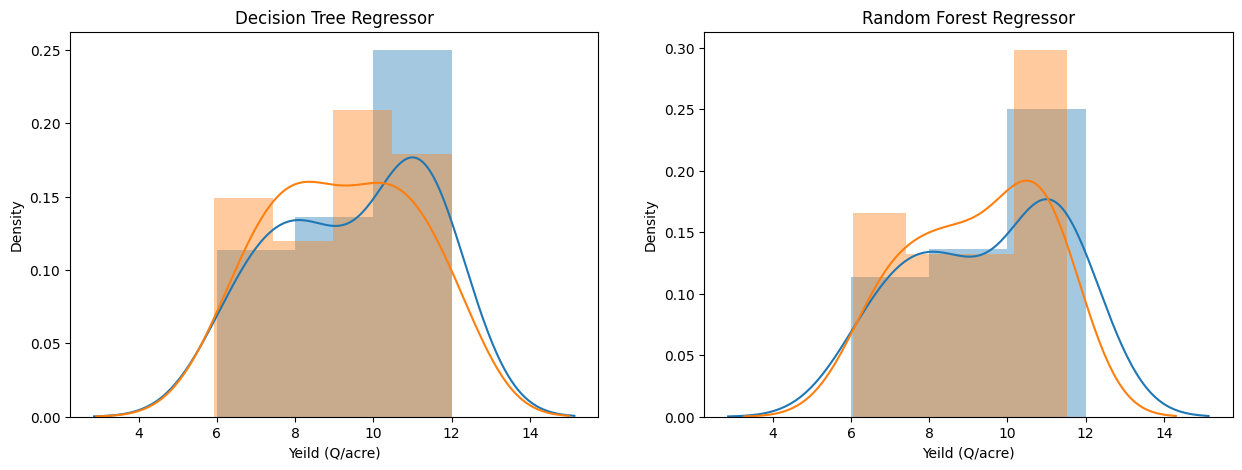

In [29]:
fig, ax = plt.subplots(1,2,figsize=(15, 5))

#plotting the actual vs predicted values for decision tree regressor
sns.distplot(y_test, ax = ax[0]).set_title('Decision Tree Regressor')
sns.distplot(d_pred, ax = ax[0])

#plotting the actual vs predicted values for random forest regressor
sns.distplot(y_test, ax = ax[1]).set_title('Random Forest Regressor')
sns.distplot(r_pred, ax = ax[1])

### Evaluation Metrics

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("Decision Tree Regressor")
print("Mean Squared Error: ", mean_squared_error(y_test, d_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, d_pred))
print("R2 Score: ", r2_score(y_test, d_pred))
print("\n")
print("Random Forest Regressor")
print("Mean Squared Error: ", mean_squared_error(y_test, r_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, r_pred))
print("R2 Score: ", r2_score(y_test, r_pred))

Decision Tree Regressor
Mean Squared Error:  0.8250555099243105
Mean Absolute Error:  0.6832293523469994
R2 Score:  0.7709296619513172


Random Forest Regressor
Mean Squared Error:  0.7108302219107439
Mean Absolute Error:  0.6836246853366845
R2 Score:  0.8026434375994264


## Feature Importance

Text(0.5, 1.0, 'Random Forest Regressor')

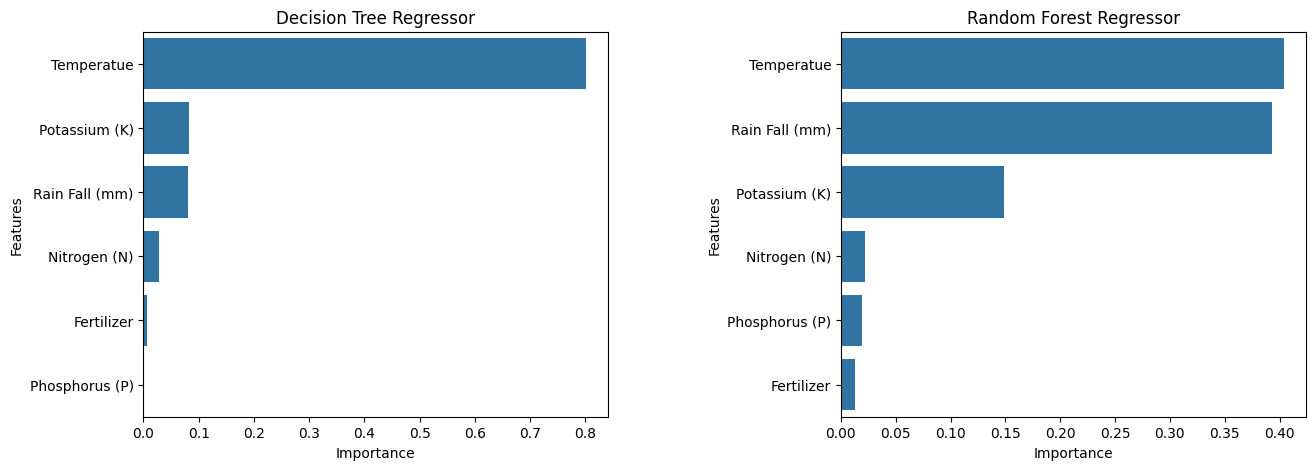

In [31]:
fig, ax = plt.subplots(1,2,figsize=(15, 5))
fig.subplots_adjust(wspace=0.5)

#Decision Tree Regressor
feature_df = pd.DataFrame({'Features':X_train.columns, 'Importance':dtr.feature_importances_})
feature_df.sort_values(by='Importance', ascending=False, inplace=True)
sns.barplot(x = 'Importance', y = 'Features', data = feature_df, ax = ax[0]).set_title('Decision Tree Regressor')

#Random Forest Regressor
feature_df = pd.DataFrame({'Features':X_train.columns, 'Importance':rfr.feature_importances_})
feature_df.sort_values(by='Importance', ascending=False, inplace=True)
sns.barplot(x = 'Importance', y = 'Features', data = feature_df, ax = ax[1]).set_title('Random Forest Regressor')

# Conclusion

The exploratory data analysis indicates the presence of two distinct crops in the dataset, evidenced by clear clustering patterns in rainfall, temperature, and crop yield. While macronutrients show signs of a positive relationship with yield, the overall relationship between crop yield and other variables is not strictly proportional. These variations are likely influenced by additional factors such as soil type, weather conditions, and crop variety. Overall, although the dataset provides useful insights, visual analysis alone is insufficient for drawing definitive conclusions, reinforcing the need for predictive modeling.

For model development, both Decision Tree Regressor and Random Forest Regressor were implemented to predict crop yield. Among the two, the Random Forest Regressor achieved better performance, with an R² score of 0.802 compared to 0.77 for the Decision Tree Regressor. Feature importance analysis shows that temperature is the most influential factor in predicting crop yield, followed by rainfall. In contrast, macronutrients contribute relatively less to the prediction. These results highlight the dominant role of environmental factors, particularly temperature and rainfall, in determining crop productivity.